# Demo 2

> Test Fast.ai models with a simple supervised learning test


In [1]:
# | default_exp demo.demo3

In [2]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [3]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

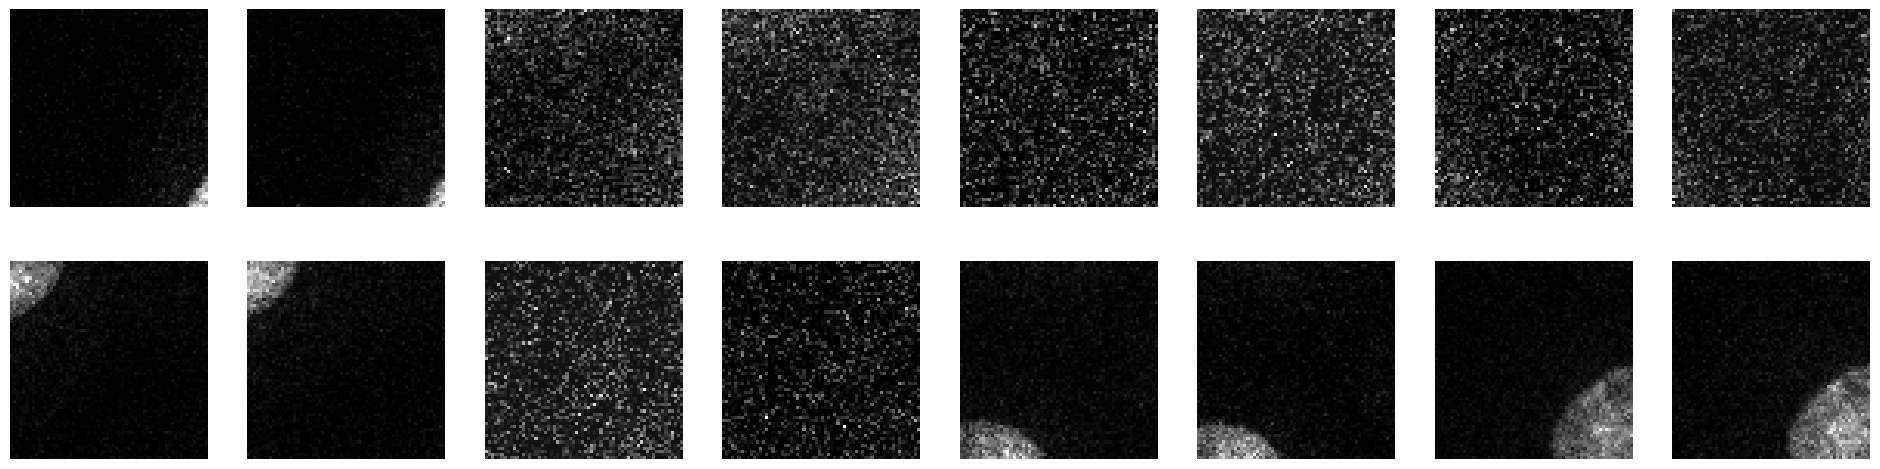

In [4]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   get_y=get_noisy_pair,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [5]:
# m = create_vision_model(models.resnet18, 1, False, n_in=1)
# print(m.children)

In [6]:

# m = nn.Sequential(*list(m.children())[:-1])
# #m.children

# mm = DynamicUnet(m, 1, (64,64), norm_type=None)
# mm.children

In [7]:
# learn = Learner(dls, mm, loss_func = F.l1_loss)
# learn.summary()

In [8]:
# learn.lr_find()

In [9]:
# learn.fit_one_cycle(20, lr_max = 1e-04)

In [10]:
# learn.show_results(max_n=1, cmap='gray')

In [11]:
from Noise2Model.models import UNet

In [13]:
autoencoder = UNet(3)
learn = Learner(dls, autoencoder, loss_func=F.l1_loss)
learn.summary()

UNet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 64 x 64   
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 32 x 32   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 64 x 32 x 32   
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                       

SuggestedLRs(valley=0.00363078061491251)

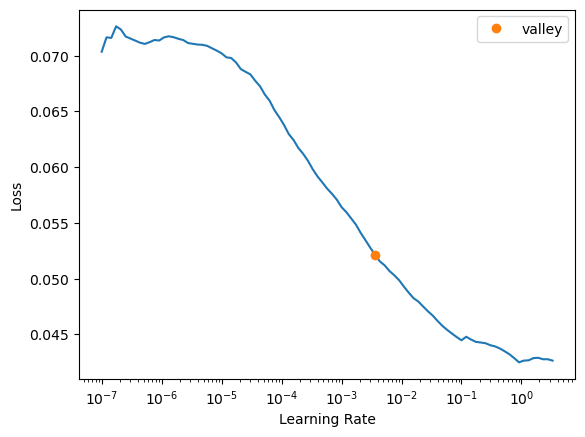

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(50, lr_max=1e-03)

epoch,train_loss,valid_loss,time
0,0.054615,0.045306,00:08
1,0.046811,0.044895,00:08
2,0.044128,0.039443,00:07
3,0.042141,0.034075,00:07
4,0.038687,0.035195,00:07
5,0.035764,0.029356,00:07
6,0.033571,0.027996,00:08
7,0.031862,0.027075,00:07
8,0.029969,0.027342,00:07
9,0.027817,0.026345,00:07


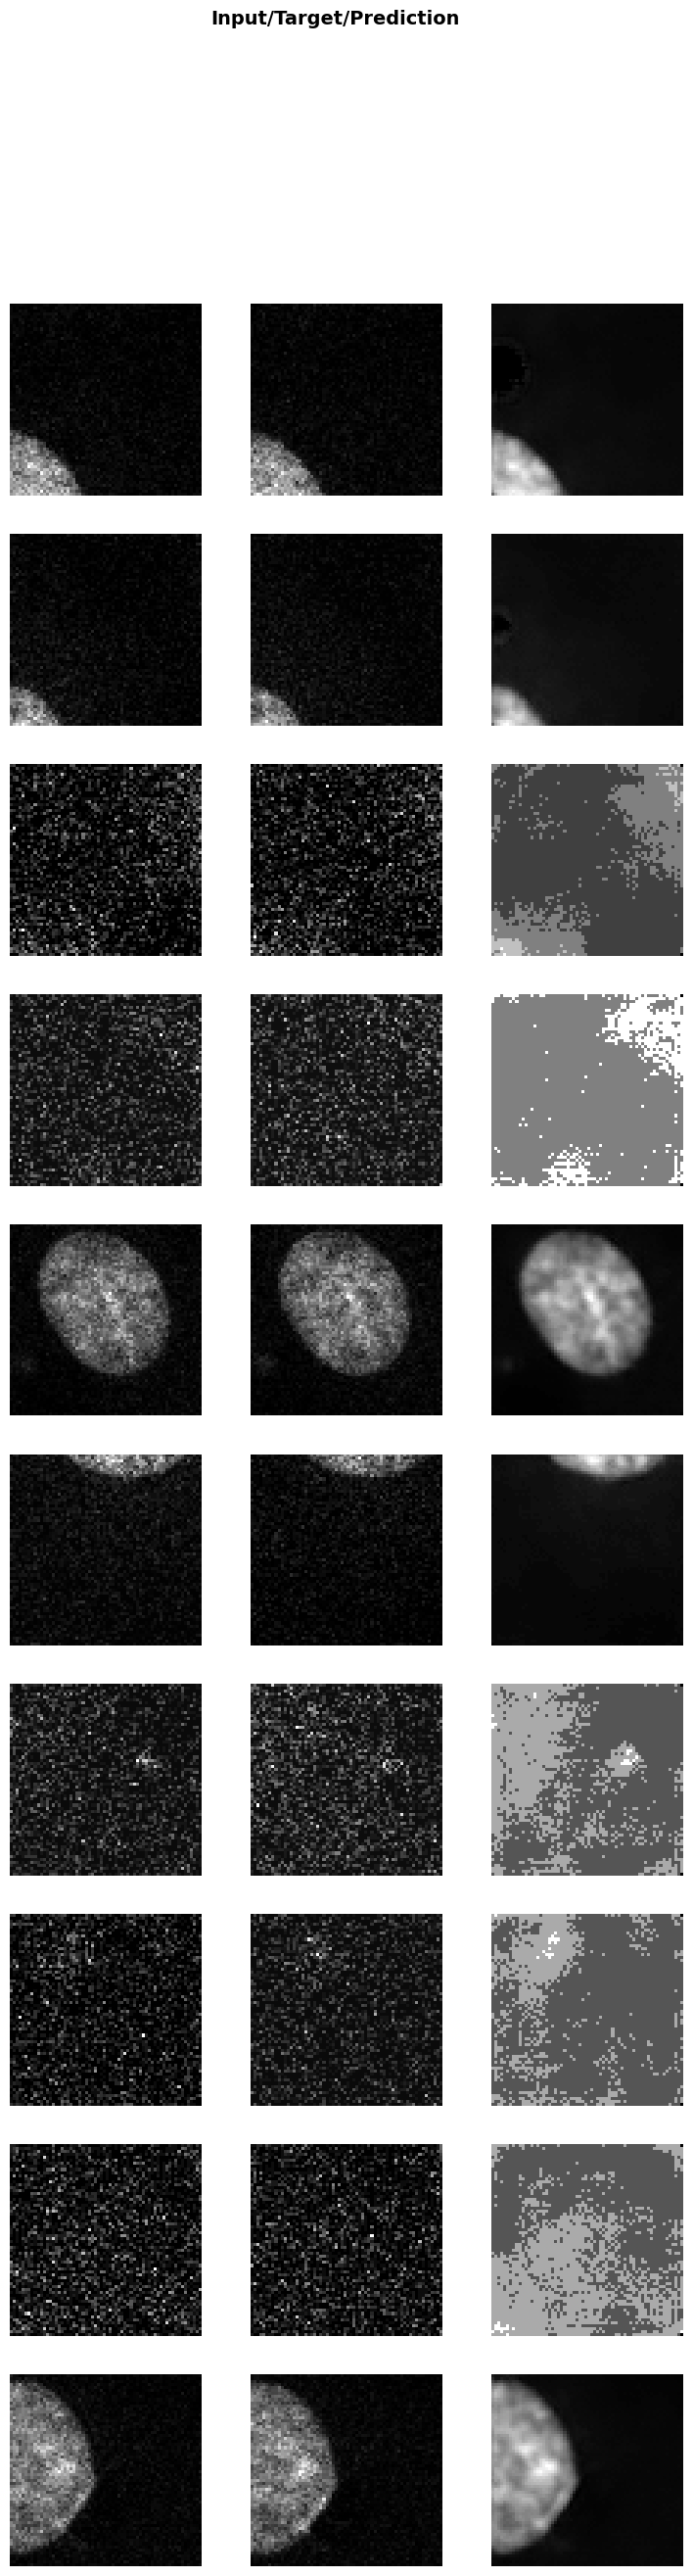

In [24]:
learn.show_results(max_n=10, cmap='gray')

In [17]:
# | hide
import nbdev
nbdev.nbdev_export()